<>:93: SyntaxWarning: invalid escape sequence '\l'
<>:93: SyntaxWarning: invalid escape sequence '\l'
C:\Users\migue\AppData\Local\Temp\ipykernel_6132\922229328.py:93: SyntaxWarning: invalid escape sequence '\l'
  cb.set_label("$\log(B)$", labelpad=5)


C:\Users\migue\AppData\Local\Temp\ipykernel_6132\922229328.py:48: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)


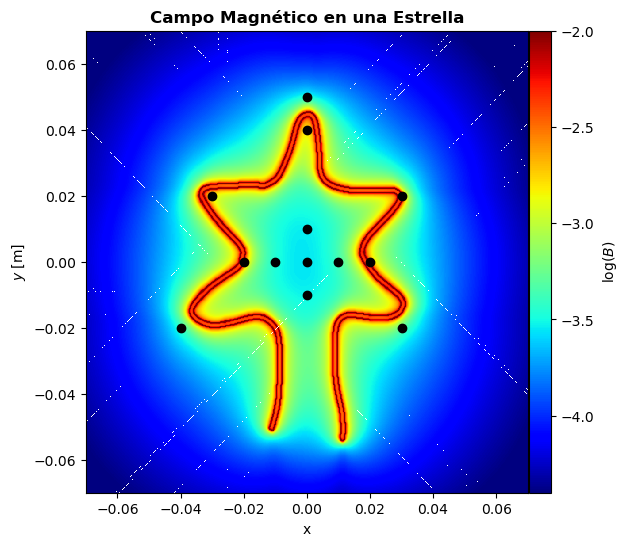

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time


# Cargar la imagen
img = cv2.imread('Estrella.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener las dimensiones de la imagen
img_height, img_width = img.shape

# El tamaño real de la espira es 11 cm (0.11 m)
real_espira_size = 0.07  # en metros

# Calcular el factor de escala: cuánto equivale 1 píxel en metros
# Suponiendo que la imagen tiene un tamaño aproximado de la espira de 2000 píxeles de ancho
# Ajustamos para que el tamaño de la espira sea de 0.11 metros
scale_factor = real_espira_size / img_width  # Factor de escala en metros por píxel

# Preprocesamiento: umbral para obtener una imagen binaria
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar los contornos de la curva
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extraer coordenadas de los contornos y aplicar el factor de escala
x_values = []
y_values = []

for contour in contours:
    for point in contour:
        # Escalar las coordenadas por el factor de escala
        x_values.append(point[0][0] * scale_factor)  # Coordenada X
        y_values.append(point[0][1] * scale_factor)  # Coordenada Y

def MagneticField(x, y, wire, I=5):
    mu0 = 4 * np.pi * 10**(-7)
    c = mu0 * I / (4 * np.pi)
    xA, yA = wire[0][0], wire[0][1]
    xB, yB = wire[1][0], wire[1][1]
    r1 = np.sqrt((x - xA)**2 + (y - yA)**2)
    r2 = np.sqrt((x - xB)**2 + (y - yB)**2)
    L = np.sqrt((xB - xA)**2 + (yB - yA)**2)
    CosTheta1 = (r2**2 - r1**2 - L**2) / (2 * L * r1)
    CosTheta2 = (r2**2 - r1**2 + L**2) / (2 * L * r2)
    distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)
    Bfield = c * (CosTheta2 - CosTheta1) / distance
    return Bfield

X_tamaño = Y_tamaño = 0.07 
Calidad = 1000
x = np.linspace(-X_tamaño, X_tamaño, Calidad)
y = np.linspace(-Y_tamaño, Y_tamaño, Calidad)

[x, y] = np.meshgrid(x, y)

sum_Bs = np.zeros_like(x)

# Iterar sobre los contornos y calcular el campo magnético solo entre puntos vecinos
for contour in contours:
    for i in range(len(contour) - 1):
        # Tomar puntos consecutivos del contorno
        wire = [(contour[i][0][0] * scale_factor - 0.0378 , contour[i][0][1] * scale_factor -0.055 ),
                (contour[i+1][0][0] * scale_factor - 0.0378 , contour[i+1][0][1] * scale_factor -0.055 )]
        B = MagneticField(x, y, wire)
        sum_Bs += B  # Sumar el campo magnético calculado para este par de puntos
        
        progress = i + 1
        percentage = (progress / (len(contour) - 1)) * 100
        print(f"Progreso: {progress}/{(len(contour)-1)} ({percentage:.2f}%)", end='\r')

# Visualización del campo magnético
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.pcolormesh(x, y, np.log10(np.abs(sum_Bs)), vmin=-2, vmax=-4, cmap="jet")
plt.title("Campo Magnético en una Estrella", fontweight='bold') 
ax.set_xlim(-X_tamaño, X_tamaño)
ax.set_xlabel(r"$x$ [m]")
ax.set_ylim(-Y_tamaño, Y_tamaño)
ax.set_ylabel(r"$y$ [m]")

x = [0, 0.01, -0.01, 0, 0, 0.02, -0.02, 0, 0, 0.03, -0.03, 0.03, -0.04]
y = [0, 0, 0, 0.01, -0.01, 0, 0, 0.04, 0.05, 0.02, 0.02, -0.02, -0.02]

# Crear la gráfica de dispersión con puntos blancos y algo transparentes
plt.scatter(x, y, color=(0, 0, 0))  # El último valor es la transparencia (0 es totalmente transparente, 1 es opaco)
plt.xlabel('x')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$\log(B)$", labelpad=5)

plt.show()

<>:93: SyntaxWarning: invalid escape sequence '\l'
<>:93: SyntaxWarning: invalid escape sequence '\l'
C:\Users\migue\AppData\Local\Temp\ipykernel_6132\3682180024.py:93: SyntaxWarning: invalid escape sequence '\l'
  cb.set_label("$\log(B)$", labelpad=5)


C:\Users\migue\AppData\Local\Temp\ipykernel_6132\3682180024.py:48: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)


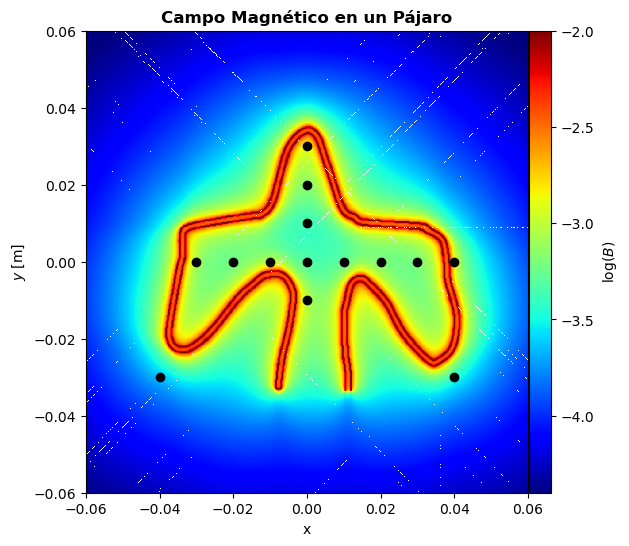

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time


# Cargar la imagen
img = cv2.imread('Pajaro.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener las dimensiones de la imagen
img_height, img_width = img.shape

# El tamaño real de la espira es 11 cm (0.11 m)
real_espira_size = 0.08  # en metros

# Calcular el factor de escala: cuánto equivale 1 píxel en metros
# Suponiendo que la imagen tiene un tamaño aproximado de la espira de 2000 píxeles de ancho
# Ajustamos para que el tamaño de la espira sea de 0.11 metros
scale_factor = real_espira_size / img_width  # Factor de escala en metros por píxel

# Preprocesamiento: umbral para obtener una imagen binaria
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar los contornos de la curva
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extraer coordenadas de los contornos y aplicar el factor de escala
x_values = []
y_values = []

for contour in contours:
    for point in contour:
        # Escalar las coordenadas por el factor de escala
        x_values.append(point[0][0] * scale_factor)  # Coordenada X
        y_values.append(point[0][1] * scale_factor)  # Coordenada Y

def MagneticField(x, y, wire, I=5):
    mu0 = 4 * np.pi * 10**(-7)
    c = mu0 * I / (4 * np.pi)
    xA, yA = wire[0][0], wire[0][1]
    xB, yB = wire[1][0], wire[1][1]
    r1 = np.sqrt((x - xA)**2 + (y - yA)**2)
    r2 = np.sqrt((x - xB)**2 + (y - yB)**2)
    L = np.sqrt((xB - xA)**2 + (yB - yA)**2)
    CosTheta1 = (r2**2 - r1**2 - L**2) / (2 * L * r1)
    CosTheta2 = (r2**2 - r1**2 + L**2) / (2 * L * r2)
    distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)
    Bfield = c * (CosTheta2 - CosTheta1) / distance
    return Bfield

X_tamaño = Y_tamaño = 0.06 
Calidad = 1000
x = np.linspace(-X_tamaño, X_tamaño, Calidad)
y = np.linspace(-Y_tamaño, Y_tamaño, Calidad)

[x, y] = np.meshgrid(x, y)

sum_Bs = np.zeros_like(x)

# Iterar sobre los contornos y calcular el campo magnético solo entre puntos vecinos
for contour in contours:
    for i in range(len(contour) - 1):
        # Tomar puntos consecutivos del contorno
        wire = [(contour[i][0][0] * scale_factor - 0.0385 , contour[i][0][1] * scale_factor - 0.034 ),
                (contour[i+1][0][0] * scale_factor - 0.0385 , contour[i+1][0][1] * scale_factor - 0.034 )]
        B = MagneticField(x, y, wire)
        sum_Bs += B  # Sumar el campo magnético calculado para este par de puntos
        
        progress = i + 1
        percentage = (progress / (len(contour) - 1)) * 100
        print(f"Progreso: {progress}/{(len(contour)-1)} ({percentage:.2f}%)", end='\r')

# Visualización del campo magnético
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.pcolormesh(x, y, np.log10(np.abs(sum_Bs)), vmin=-2, vmax=-4, cmap="jet")
plt.title("Campo Magnético en un Pájaro", fontweight='bold') 
ax.set_xlim(-X_tamaño, X_tamaño)
ax.set_xlabel(r"$x$ [m]")
ax.set_ylim(-Y_tamaño, Y_tamaño)
ax.set_ylabel(r"$y$ [m]")

x = [0, 0.01, 0.02, 0.03, -0.01, -0.02, -0.03, 0, 0, 0, 0, 0.04, -0.04, 0.04]
y = [0, 0, 0, 0, 0, 0, 0, 0.01, 0.02, 0.03, -0.01, -0.03, -0.03, 0]

# Crear la gráfica de dispersión con puntos blancos y algo transparentes
plt.scatter(x, y, color=(0, 0, 0))  # El último valor es la transparencia (0 es totalmente transparente, 1 es opaco)
plt.xlabel('x')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$\log(B)$", labelpad=5)

plt.show()

<>:92: SyntaxWarning: invalid escape sequence '\l'
<>:92: SyntaxWarning: invalid escape sequence '\l'
C:\Users\migue\AppData\Local\Temp\ipykernel_6132\689101390.py:92: SyntaxWarning: invalid escape sequence '\l'
  cb.set_label("$\log(B)$", labelpad=5)


C:\Users\migue\AppData\Local\Temp\ipykernel_6132\689101390.py:48: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)


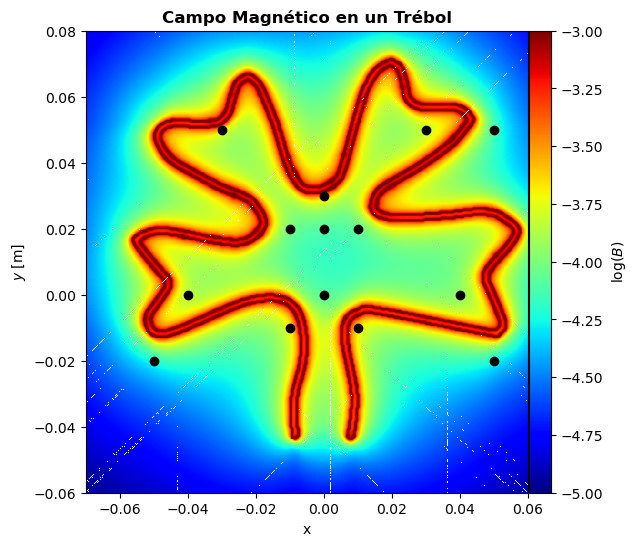

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time


# Cargar la imagen
img = cv2.imread('Trebol.jpg', cv2.IMREAD_GRAYSCALE)

# Obtener las dimensiones de la imagen
img_height, img_width = img.shape

# El tamaño real de la espira es 11 cm (0.11 m)
real_espira_size = 0.115  # en metros

# Calcular el factor de escala: cuánto equivale 1 píxel en metros
# Suponiendo que la imagen tiene un tamaño aproximado de la espira de 2000 píxeles de ancho
# Ajustamos para que el tamaño de la espira sea de 0.11 metros
scale_factor = real_espira_size / img_width  # Factor de escala en metros por píxel

# Preprocesamiento: umbral para obtener una imagen binaria
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Encontrar los contornos de la curva
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extraer coordenadas de los contornos y aplicar el factor de escala
x_values = []
y_values = []

for contour in contours:
    for point in contour:
        # Escalar las coordenadas por el factor de escala
        x_values.append(point[0][0] * scale_factor)  # Coordenada X
        y_values.append(point[0][1] * scale_factor)  # Coordenada Y

def MagneticField(x, y, wire, I=1):
    mu0 = 4 * np.pi * 10**(-7)
    c = mu0 * I / (4 * np.pi)
    xA, yA = wire[0][0], wire[0][1]
    xB, yB = wire[1][0], wire[1][1]
    r1 = np.sqrt((x - xA)**2 + (y - yA)**2)
    r2 = np.sqrt((x - xB)**2 + (y - yB)**2)
    L = np.sqrt((xB - xA)**2 + (yB - yA)**2)
    CosTheta1 = (r2**2 - r1**2 - L**2) / (2 * L * r1)
    CosTheta2 = (r2**2 - r1**2 + L**2) / (2 * L * r2)
    distance = np.sqrt(2 * r1**2 * r2**2 + 2 * r1**2 * L**2 + 2 * r2**2 * L**2 - r1**4 - r2**4 - L**4) / (2 * L)
    Bfield = c * (CosTheta2 - CosTheta1) / distance
    return Bfield

Calidad = 1000
x = np.linspace(-0.07, 0.07, Calidad)
y = np.linspace(-0.06, 0.08, Calidad)

[x, y] = np.meshgrid(x, y)

sum_Bs = np.zeros_like(x)

# Iterar sobre los contornos y calcular el campo magnético solo entre puntos vecinos
for contour in contours:
    for i in range(len(contour) - 1):
        # Tomar puntos consecutivos del contorno
        wire = [(contour[i][0][0] * scale_factor - 0.0567 , contour[i][0][1] * scale_factor - 0.045 ),
                (contour[i+1][0][0] * scale_factor - 0.0567 , contour[i+1][0][1] * scale_factor - 0.045 )]
        B = MagneticField(x, y, wire)
        sum_Bs += B  # Sumar el campo magnético calculado para este par de puntos
        
        progress = i + 1
        percentage = (progress / (len(contour) - 1)) * 100
        print(f"Progreso: {progress}/{(len(contour)-1)} ({percentage:.2f}%)", end='\r')

# Visualización del campo magnético
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.pcolormesh(x, y, np.log10(np.abs(sum_Bs)), vmin=-5, vmax=-3, cmap="jet")
plt.title("Campo Magnético en un Trébol", fontweight='bold') 
ax.set_xlim(-0.07, 0.06)
ax.set_xlabel(r"$x$ [m]")
ax.set_ylim(-0.06, 0.08)
ax.set_ylabel(r"$y$ [m]")

x = [0, 0.04, -0.04, 0, 0.01, -0.01, -0.03, 0.03, 0.05, 0, -0.01, 0.01, -0.05, 0.05]
y = [0, 0, 0, 0.02, 0.02, 0.02, 0.05, 0.05, 0.05, 0.03, -0.01, -0.01, -0.02, -0.02]

# Crear la gráfica de dispersión con puntos blancos y algo transparentes
plt.scatter(x, y, color=(0, 0, 0))  # El último valor es la transparencia (0 es totalmente transparente, 1 es opaco)
plt.xlabel('x')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.01)
cb = fig.colorbar(im, ax=ax, orientation="vertical", cax=cax)
cb.set_label("$\log(B)$", labelpad=5)

plt.show()